# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/ITC/5toSem/semanaTecAn/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Dataset url
url = "datasets/cartwheel/cartwheel.csv"

# Load the dataset
df = pd.read_csv(Ruta + url)

# Exploring the content of the data set

Get a general 'feel' of the data


In [6]:
df
# Age is the age of participant doing a cartwheel
# Gender = gender of participant
# GenderGroup = F:1, M:2.
# Glasses? Yes, they use glasses or no, they dont
# Height of the person in inches
# Wingspan in inches
# CWD = CartWheelDistance in inches
# Complete? Did they complete the cartwheel: Yes or not
# CompleteGroup: Yes:1, No:0
# Score = How good of a grade the cartwheel deserves

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.00,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.00,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.00,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.00,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.00,75.0,72,N,0.0,4
5,6,24.0,M,2,N,0,75.00,71.0,81,N,0.0,3
6,7,28.0,M,2,N,0,75.00,76.0,107,Y,1.0,10
7,8,22.0,F,1,N,0,65.00,62.0,98,Y,1.0,9
8,9,29.0,M,2,Y,1,74.00,73.0,106,N,0.0,5
9,10,33.0,F,1,Y,1,63.00,60.0,65,Y,1.0,8


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [8]:
df.CompleteGroup.value_counts()

,count
CompleteGroup,
1.0,43
0.0,8


In [10]:
# Proportion of each distinct value of a variable occurs in a data set
x= df.CompleteGroup.value_counts()
x= 100*x/x.sum()
x
#84.313725 si completaron la CW
#15.686275 no

,count
CompleteGroup,
1.0,84.313725
0.0,15.686275


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [19]:
# Total number of observations
print("Total number of observations: " + str(df.shape[0]))

# Total number of null observations
print("Total number of null observations in Age: " + str(df.Age.isnull().sum()))
print("Total number of null observations in CompleteGroup: " + str(df.CompleteGroup.isnull().sum()))

# Total number of counts (excluding missing values)
print("Total number of counts in Age excluding missing values: " + str(df.Age.notnull().sum()))

Total number of observations: 52
Total number of null observations in Age: 1
Total number of null observations in CompleteGroup: 1
Total number of counts in Age excluding missing values: 51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

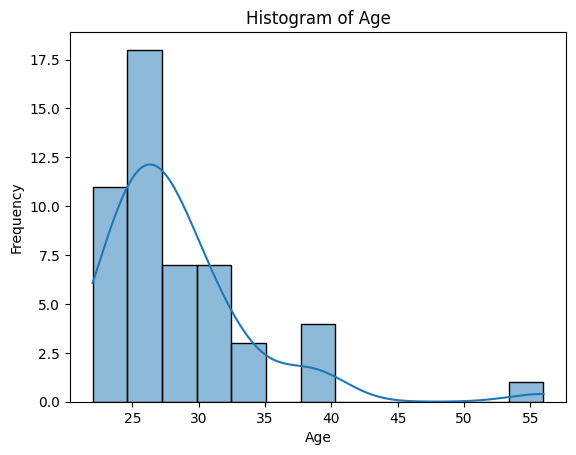

In [28]:
# Plot histogram of the total bill only
var2plot = df['Age']
sns.histplot(var2plot, kde=True)  # kde=True adds a kernel density estimate
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


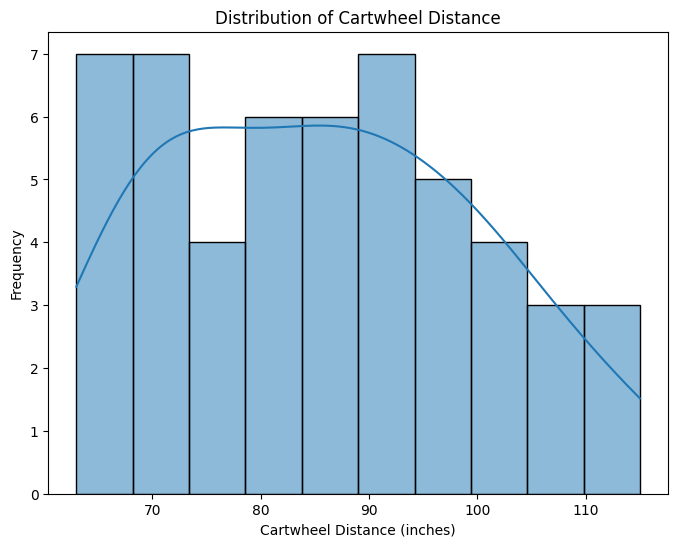

In [30]:
# Plot distribution of Cartwheel distance
plt.figure(figsize=(8, 6))
sns.histplot(df['CWDistance'].dropna(), kde=True, bins=10)
plt.title('Distribution of Cartwheel Distance')
plt.xlabel('Cartwheel Distance (inches)')
plt.ylabel('Frequency')
plt.show()

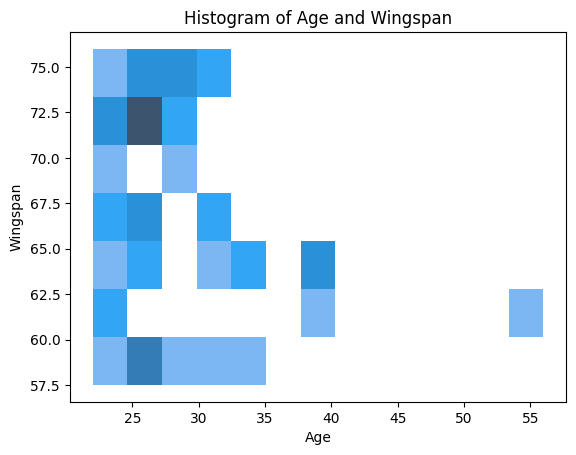

In [36]:
# Plot histogram of Age and Wingspan with Frequency
var1= df['Age']
var2= df['Wingspan']
sns.histplot(data=df, x=var1, y=var2)
plt.xlabel('Age')
plt.ylabel('Wingspan')
plt.title('Histogram of Age and Wingspan')
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

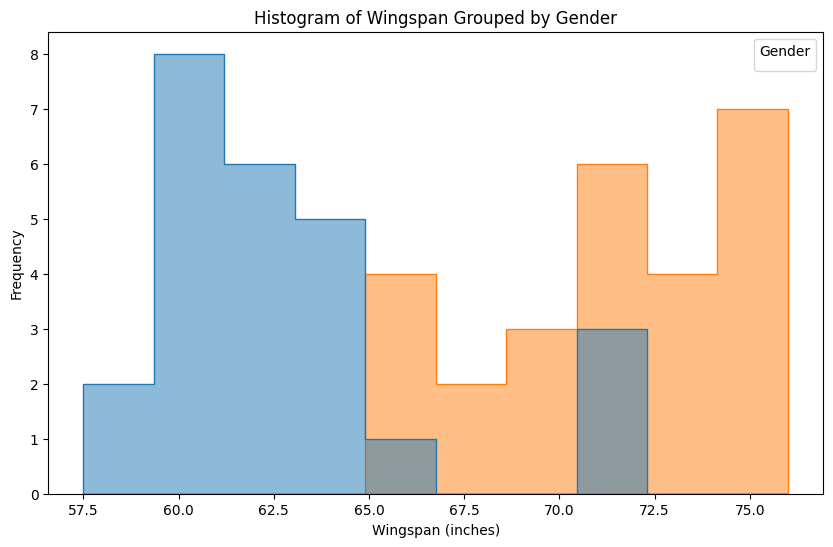

In [38]:
# Create histograms of the "Wingspan" grouped by "Gender"
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Wingspan', hue='Gender', kde=False, bins=10, element='step', alpha=0.5)

# Add titles and labels
plt.title('Histogram of Wingspan Grouped by Gender')
plt.xlabel('Wingspan (inches)')
plt.ylabel('Frequency')
plt.legend(title='Gender')  # Display the legend with the title 'Gender'

# Display the plot
plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

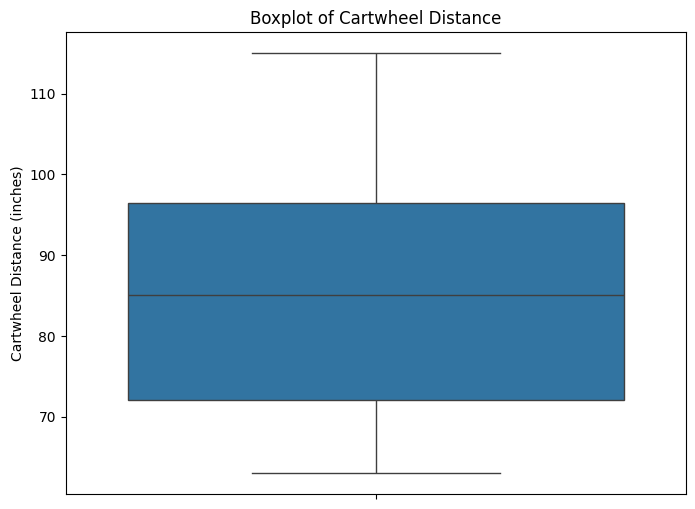

In [39]:
# Create the boxplot of the "CWDistance"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='CWDistance')

# Add titles and labels
plt.title('Boxplot of Cartwheel Distance')
plt.ylabel('Cartwheel Distance (inches)')

# Display the plot
plt.show()

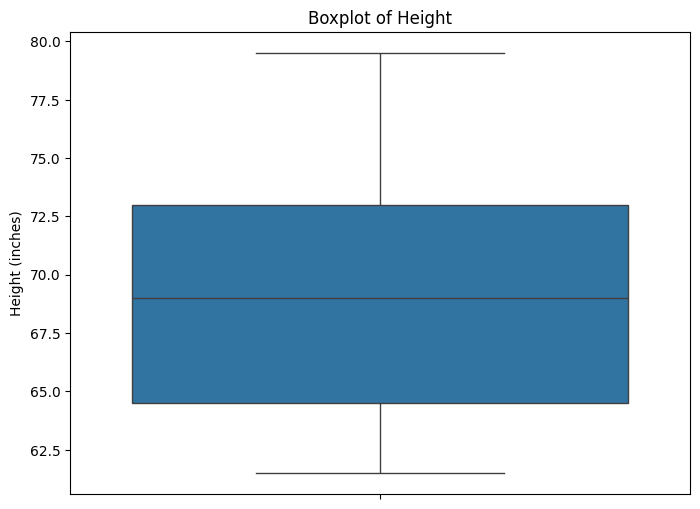

In [40]:
# Create the boxplot of the "Height"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Height')

# Add titles and labels
plt.title('Boxplot of Height')
plt.ylabel('Height (inches)')

# Display the plot
plt.show()

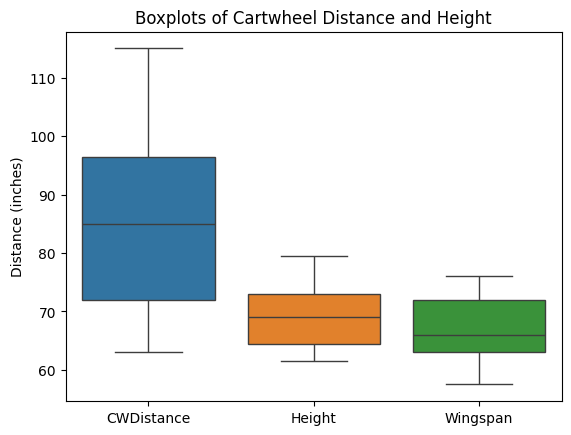

In [49]:
# Create the boxplots of the "CWDistance" and of the "Height" and of the "Wingspan"
df_variables = df[['CWDistance', 'Height', 'Wingspan']]
sns.boxplot(data=df_variables)
plt.title('Boxplots of Cartwheel Distance and Height')
plt.ylabel('Distance (inches)')
plt.show()

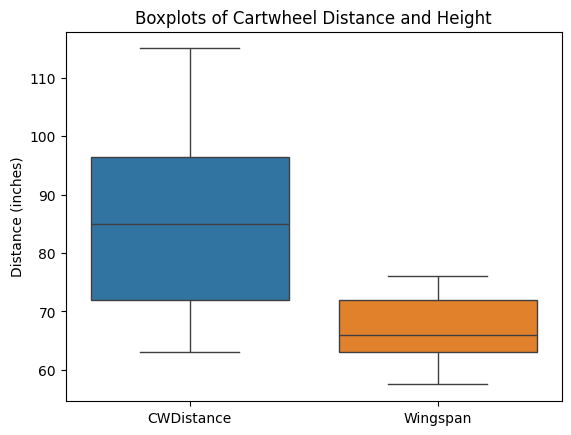

In [50]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"
df_variables = df[['CWDistance','Wingspan']]
sns.boxplot(data=df_variables)
plt.title('Boxplots of Cartwheel Distance and Height')
plt.ylabel('Distance (inches)')
plt.show()


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

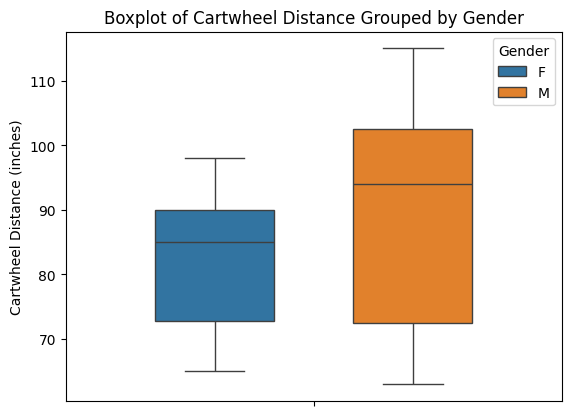

In [57]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"
# Create a boxplot of Height grouped by Gender
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)
# Add titles and labels
plt.title('Boxplot of Cartwheel Distance Grouped by Gender')
plt.ylabel('Cartwheel Distance (inches)')
plt.legend(title='Gender')  # Display the legend with the title 'Gender'
# Display the plot
plt.show()

# Histograms and boxplots plotted by groups

We can also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


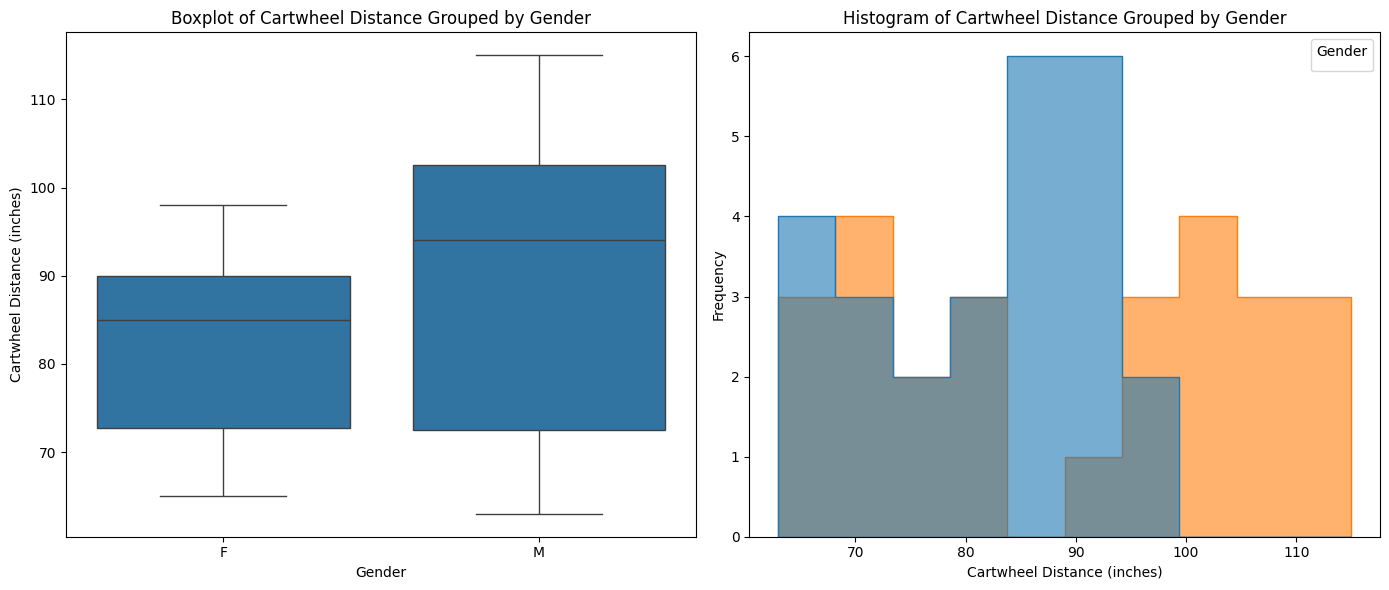

In [58]:
# Create a boxplot and histogram of the "CWDistance" grouped by "Gender"
plt.figure(figsize=(14, 6))

# Create the boxplot of CWDistance grouped by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='CWDistance')
plt.title('Boxplot of Cartwheel Distance Grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Cartwheel Distance (inches)')

# Create the histogram of CWDistance grouped by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='CWDistance', hue='Gender', kde=False, bins=10, element='step', alpha=0.6)
plt.title('Histogram of Cartwheel Distance Grouped by Gender')
plt.xlabel('Cartwheel Distance (inches)')
plt.ylabel('Frequency')
plt.legend(title='Gender')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

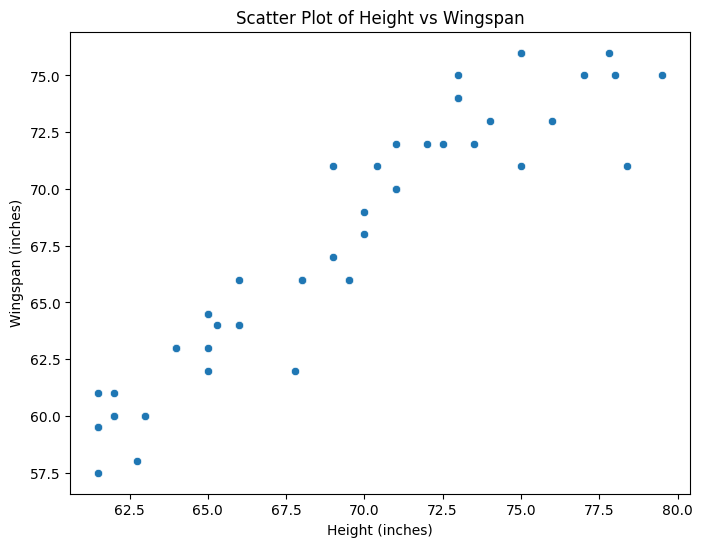

In [59]:
# scatter plot between two variables
# Scatter plot of Height vs Wingspan
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan')
plt.title('Scatter Plot of Height vs Wingspan')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.show()


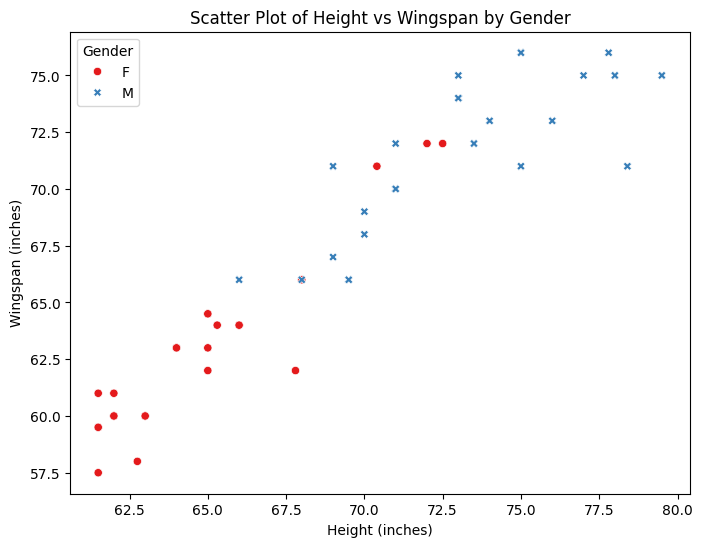

In [63]:
# scatter plot between two variables (one categorical)
# Scatter plot of Height vs Wingspan with Gender as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', style='Gender', palette='Set1')
plt.title('Scatter Plot of Height vs Wingspan by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.legend(title='Gender')
plt.show()

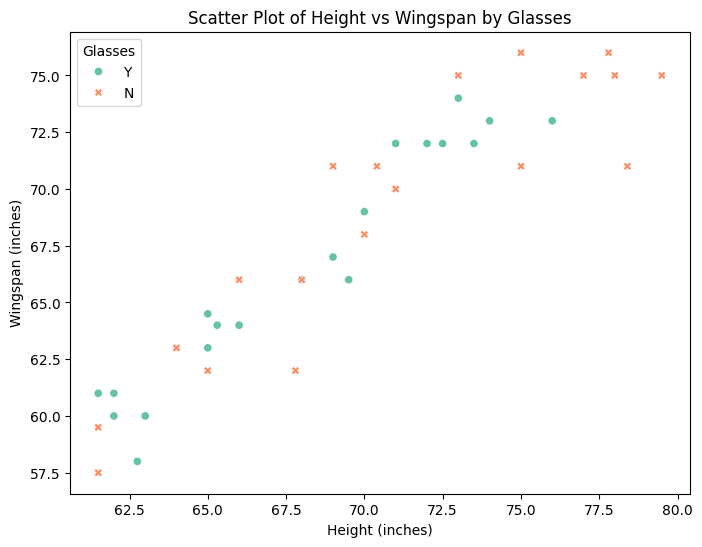

In [62]:
# scatter plot between two variables (one categorical)
# Scatter plot of Height vs Wingspan with Glasses as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Glasses', style='Glasses', palette='Set2')
plt.title('Scatter Plot of Height vs Wingspan by Glasses')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.legend(title='Glasses')
plt.show()


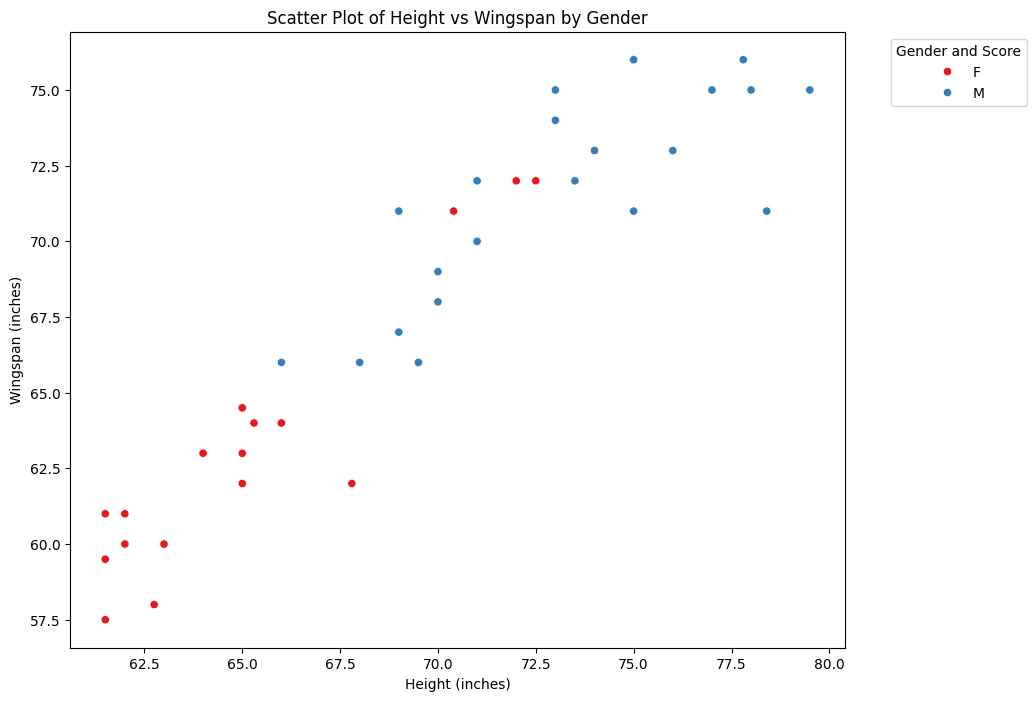

In [67]:
# Scatter plot between two variables grouped according to a categorical variable
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', palette='Set1', legend='brief')
plt.title('Scatter Plot of Height vs Wingspan by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.legend(title='Gender and Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

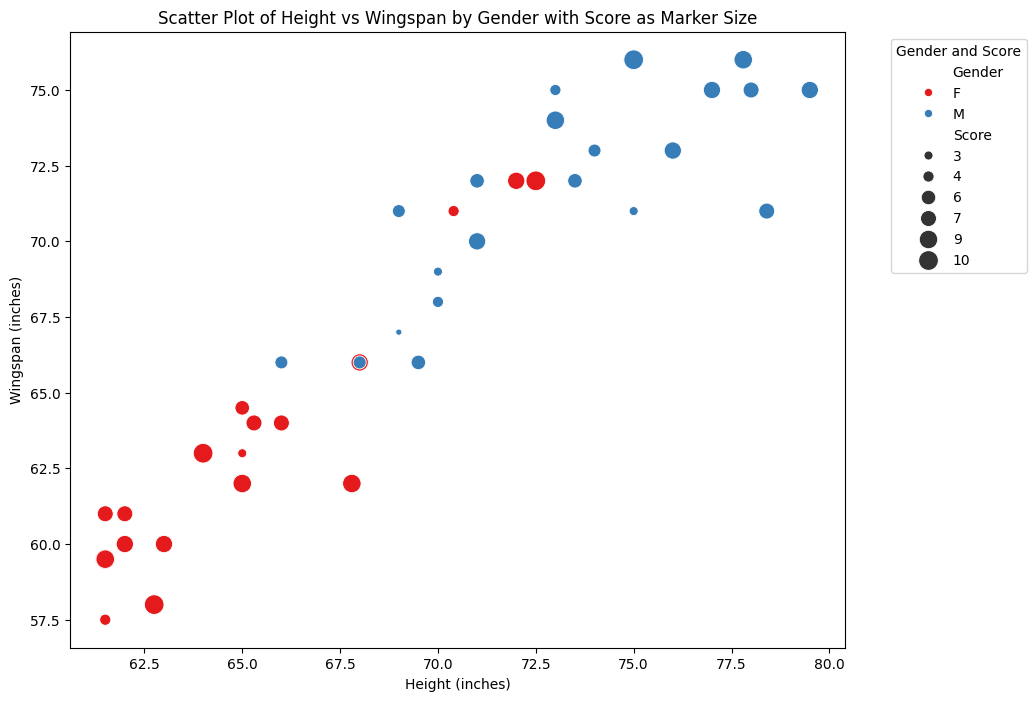

In [66]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
# Scatter plot of Height vs Wingspan with Gender as hue and Size of markers by Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', size='Score', palette='Set1', sizes=(20, 200), legend='brief')
plt.title('Scatter Plot of Height vs Wingspan by Gender with Score as Marker Size')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.legend(title='Gender and Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [70]:
# Import the packages that we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset url
url = "datasets/iris.csv"

# Load the dataset
df = pd.read_csv(Ruta + url)

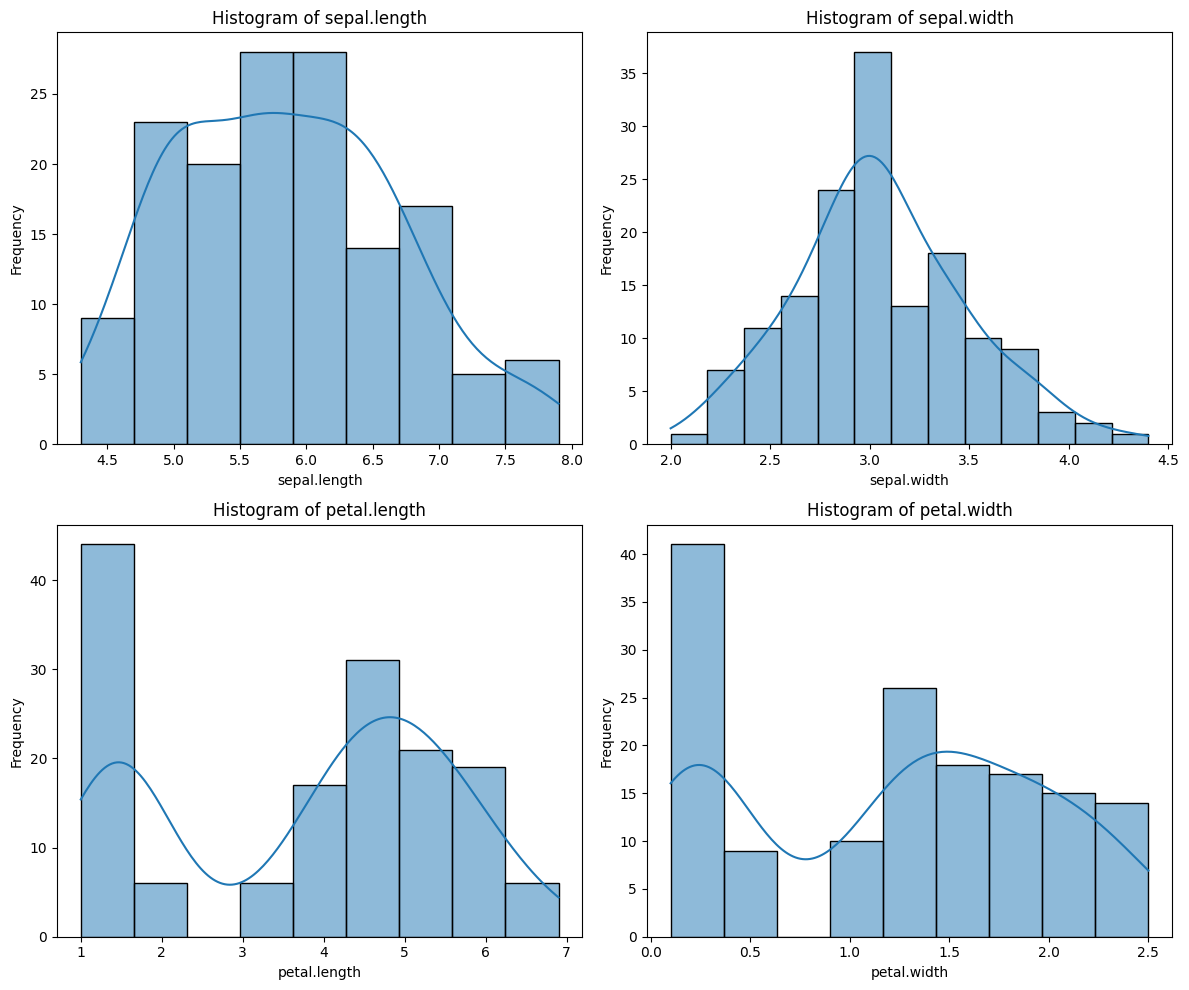

In [71]:
# Plot histograms for each quantitative variable
quantitative_vars = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

# Create histograms
plt.figure(figsize=(12, 10))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


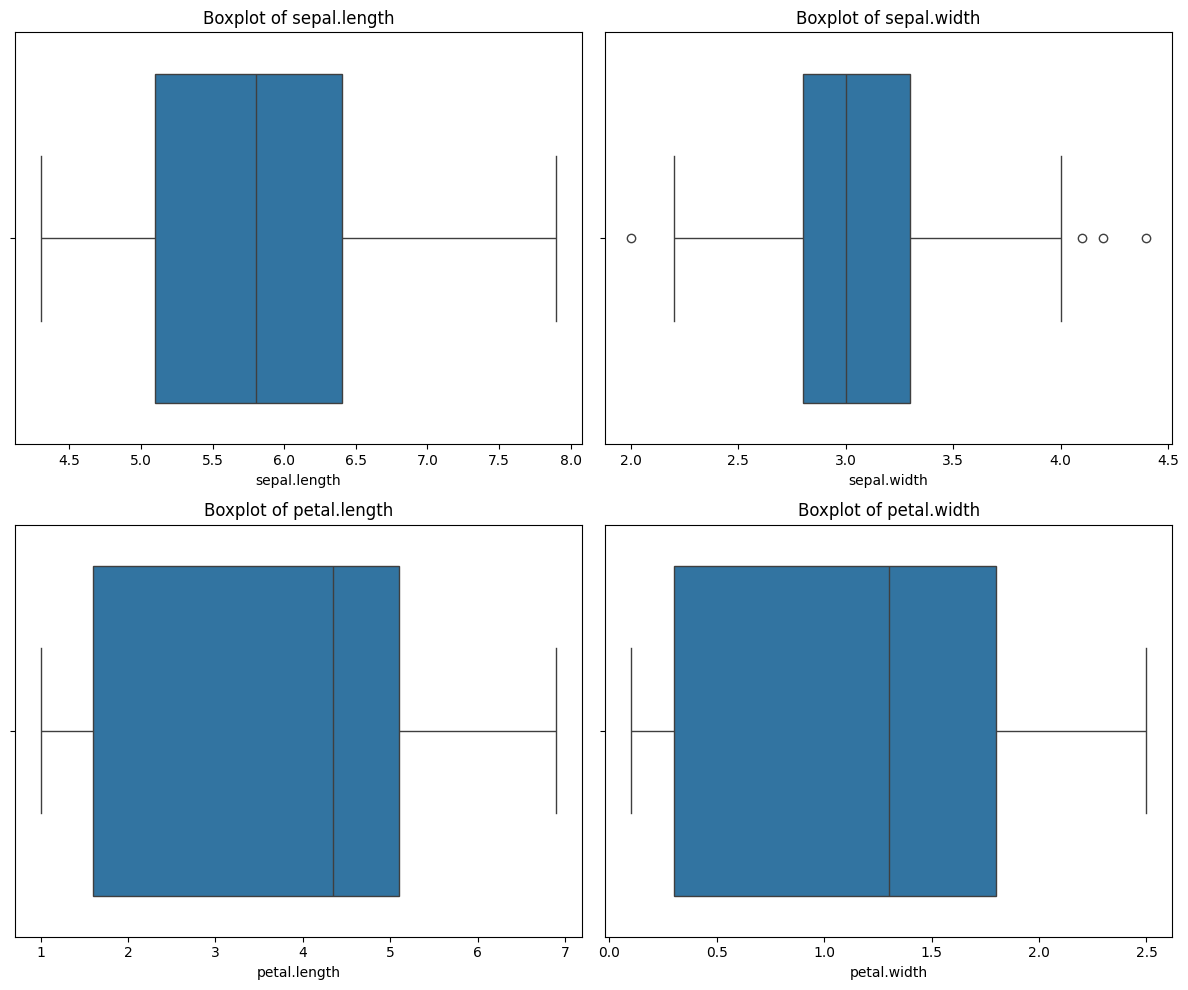

In [72]:
# Create boxplots for each quantitative variable
plt.figure(figsize=(12, 10))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


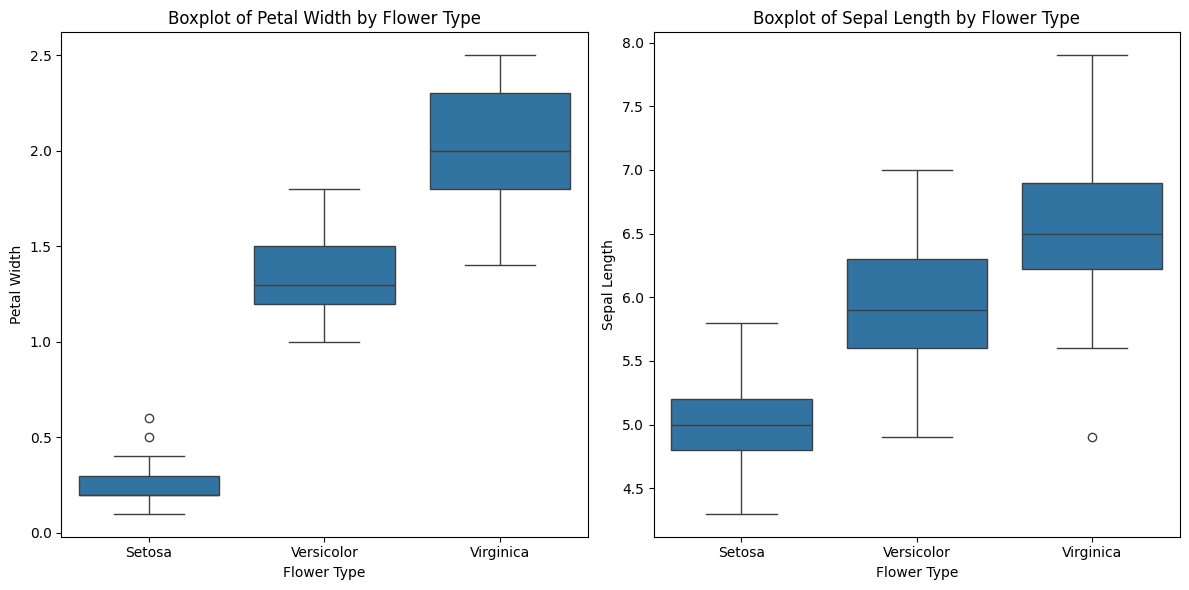

In [73]:
# Boxplot of petal width grouped by type of flower
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='variety', y='petal.width', data=df)
plt.title('Boxplot of Petal Width by Flower Type')
plt.xlabel('Flower Type')
plt.ylabel('Petal Width')

# Boxplot of sepal length grouped by type of flower
plt.subplot(1, 2, 2)
sns.boxplot(x='variety', y='sepal.length', data=df)
plt.title('Boxplot of Sepal Length by Flower Type')
plt.xlabel('Flower Type')
plt.ylabel('Sepal Length')

plt.tight_layout()
plt.show()


## Description of Each of the Quantitative Variables

**Sepal Length (`sepal.length`)**: This variable represents the length of the sepal in centimeters. From the histogram, you can observe the distribution of sepal lengths. The boxplot will show the median, quartiles, and any potential outliers in sepal length.

**Sepal Width (`sepal.width`)**: This variable measures the width of the sepal in centimeters. The histogram provides insights into the frequency distribution of sepal widths, while the boxplot shows the central tendency and spread of the data, including any potential outliers.

**Petal Length (`petal.length`)**: This variable indicates the length of the petal in centimeters. Histograms will help visualize the distribution of petal lengths across the dataset. The boxplot will reveal the variation in petal lengths and how they are distributed.

**Petal Width (`petal.width`)**: This variable measures the width of the petal in centimeters. The histogram provides a view of the petal width distribution, while the boxplot shows its spread and central tendency.
